In [1]:
import numpy as np
#from scipy.integrate import solve_ivp
#from scipy.signal import spectrogram
import matplotlib.pyplot as plt
#from piaxi_numerics import set_params, solve_system, get_text_params
from piaxi_utils import fit_crude_epsilon_relation, fit_Fpi

verbosity = 9

In [2]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## TODO: Data generation, importing, and preprocessing

# TODO: load dataset
from sklearn.datasets import make_classification
X, y = make_classification(random_state = 0, n_features = 20, n_informative = 18, n_classes = 3)

# TODO: split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [3]:
# Create dataset processing and classification pipeline
model_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
model_mlp = Pipeline([('scaler', StandardScaler()), ('mlp', MLPRegressor(max_iter=400))])
models = [model_svc, model_mlp]

# Fit model to training dataset
for model in models:
    print(list(model.named_steps.keys())[1])
    model.fit(X_train, y_train)
    # Evaluate fit with test dataset
    print("Score: %.2f" % model.score(X_test, y_test))
    print(" --------------------------------------- ")

svc
Score: 0.72
 --------------------------------------- 
mlp
Score: 0.28
 --------------------------------------- 


/gpfs/runtime/opt/anaconda/2022.05/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


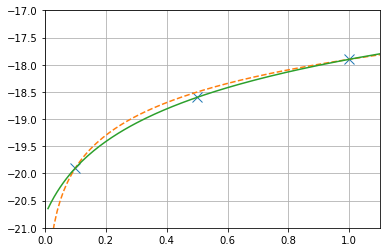

y = 2.615 log_10(10x + 0.868) + -20.610


In [4]:
fit_eps = True
eps = 1.
if fit_eps:
    pts = [(0.1,-19.9,eps), (0.5,-18.6,eps), (1,-17.9,eps)]
    fit_res, _ = fit_crude_epsilon_relation(pts_in=pts, plot_fit=True)
    if verbosity >= 0:
        print('y = %.3f log_10(10x + %.3f) + %.3f' % (fit_res[0], fit_res[1], fit_res[2]))

In [5]:
fit_F = True

if fit_F:
    Fpi = fit_Fpi(1.0, 1e-20)

input_str 3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json
output_dir_in ./test_data/
output_dir split
label:   None
phash:   None
input_label:   3_neutrals
input_phash:   5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3
output_dir ./test_data/v2.8/3_neutrals


/oscar/home/sloane1/projects/pi-axiverse/piaxi_utils.py:889: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


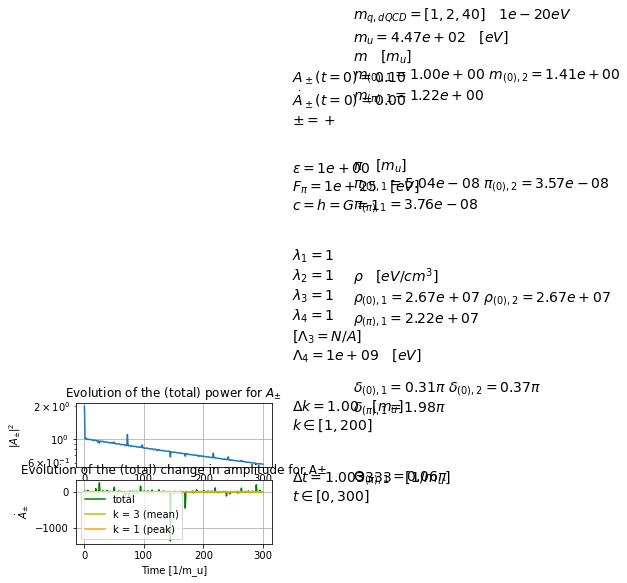

NameError: name 'tot_res' is not defined

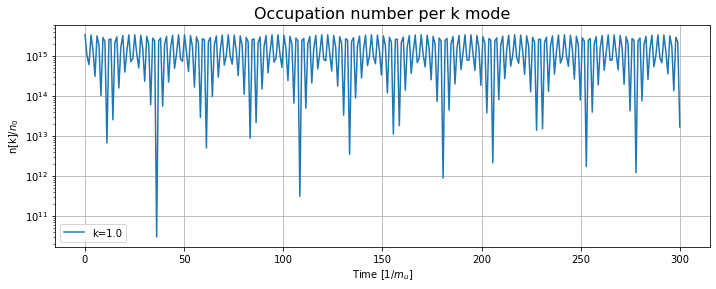

In [6]:
from piaxi_utils import plot_single_case

#plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='.\\test_data\\')
plot_single_case('3_neutrals_5f6d4c42050e31fa8d06ce7d9fc526e1eff881f3.json', output_dir='./test_data/')
                 

In [ ]:
## Analyze a run's plots TODO/WIP
if False:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Sample data (replace with actual data)
    data = {
        # ... (your provided dataset)
    }

    # Placeholder for raw solution (replace with actual data when available)
    raw_solution = np.random.rand(300, 200)  # Example TxN-dimensional array

    # Heatmap for raw solution
    plt.figure(figsize=(12, 8))
    sns.heatmap(raw_solution, cmap='viridis')
    plt.title("Heatmap of Raw Solution (Amplitude of Photon Field)")
    plt.xlabel("k-mode")
    plt.ylabel("Time")
    plt.show()

    # Bar plots for k_mean_arr, k_peak_arr, and k_sens_arr
    k_modes = np.arange(1, len(data["k_mean_arr"]) + 1)
    plt.figure(figsize=(12, 8))
    plt.bar(k_modes, data["k_mean_arr"], label="k_mean_arr", alpha=0.6)
    plt.bar(k_modes, data["k_peak_arr"], label="k_peak_arr", alpha=0.6)
    plt.bar(k_modes, data["k_sens_arr"], label="k_sens_arr", alpha=0.6)
    plt.xlabel("k-mode")
    plt.ylabel("Value")
    plt.title("Bar Plots for k_mean_arr, k_peak_arr, and k_sens_arr")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Categorical plot for k_class_arr
    plt.figure(figsize=(12, 8))
    sns.countplot(data["k_class_arr"])
    plt.title("Distribution of Classification Labels")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()
